# Functions

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [1]:
# function with 3 mandatory arguments
def f(a,b,c):
    return a + b + c

In [13]:
# TypeError: f() missing 1 required positional argument: 'c'
# f(1,2)

# TypeError: f() takes 3 positional arguments but 4 were given
# f(1,2,3,4)

# SyntaxError: positional argument follows keyword argument
# f(c=3, b=2, 1)

# TypeError: f() got multiple values for argument 'b'
# f(1, 2, c=3, b=4)

In [6]:
# call f with args given by position
f(1,2,3)

6

In [8]:
#call f with args by keyword
r1 = f(a=1, b=2, c=3)
r2 = f(b=2, c=3, a=1)
r1, r2

(6, 6)

In [9]:
# call with mixed mode: position + keyword
f(1, c=3, b=2)

6

In [18]:
# optional arg
r3 = sum([1,2,3], 2)
r4 = sum([1,2,3], start=2) # better
r3, r4

(8, 8)

In [23]:
# call all optional args by keyword
# mandatory in pandas since recently
df = pd.read_csv('cities.csv', sep=',', encoding='utf-8')
df.head(3)

,insee_code,city_code,zip_code,label,latitude,longitude,department_name,department_number,region_name,region_geojson_name
0,25620,ville du pont,25650,ville du pont,46.999873,6.498147,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
1,25624,villers grelot,25640,villers grelot,47.361512,6.235167,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté
2,25615,villars les blamont,25310,villars les blamont,47.368384,6.871415,doubs,25,bourgogne-franche-comté,Bourgogne-Franche-Comté


In [24]:
# wrong definition
def f(stop, start=0, city='Pau', l=[]):
    for i in range(start, stop):
        l.append(city)
    return l

In [25]:
f(10)

['Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau']

In [26]:
l = ['Bayonne', 'Toulouse']
f(3, start=2, city='Lyon', l=l)

['Bayonne', 'Toulouse', 'Lyon']

In [27]:
f(3, start=2, city='Lyon')

['Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Lyon']

In [28]:
f(3, city='Toulouse')

['Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Pau',
 'Lyon',
 'Toulouse',
 'Toulouse',
 'Toulouse']

In [30]:
def f(stop, start=0, city='Pau', l=None):
    if l is None:
        l = []
    for i in range(start, stop):
        l.append(city)
    return l

In [31]:
r1 = f(10)
r2 = f(3, start=2, city='Lyon')
print(r1)
print(r2)

['Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau', 'Pau']
['Lyon']


In [33]:
def isMagic(square, ruleDiag=True, ruleAllNumbers=True, ms=None):
    n = len(square)
    if ruleAllNumbers:
        ms = magicSum(n)
    elif ms is None:
        raise ValueError("Missing magic sum, cannot compute it with rule all numbers deactivated")
    res = checkAllRowsMagic(square, n, ms) \
        and checkAllColumnsMagic(square, n, ms)
    if ruleDiag:
        res = res and checkAllDiagonalsMagic(square, n, ms)
    res = res and checkAllNumbersInRange(square, n, repeat=not RuleAllNumber)

In [35]:
# ValueError: Missing magic sum, cannot compute it with rule all numbers deactivated
# isMagic([], ruleAllNumbers=False)

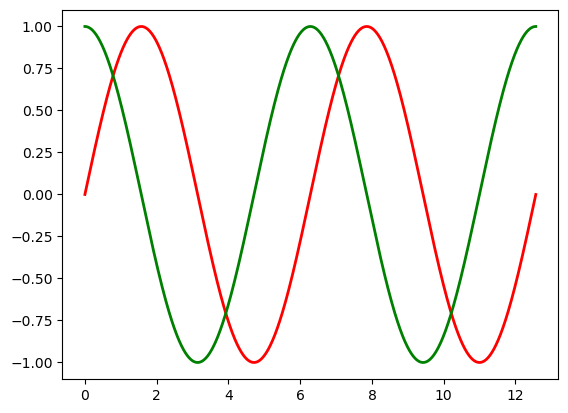

In [44]:
x = np.linspace(0, 4*np.pi, num=1000)
y1 = np.sin(x)
y2 = np.cos(x)
# call plt.plot with:
# - x, y1, 'r', x, y2, 'g' => *args
# - linewidth=2 => **kwargs
plt.plot(x, y1, 'r', x, y2, 'g', linewidth=2)

In [65]:
# a, *args: positional arguments (a mandatory, args 0 to n values: tuple)
# b: optional keyword arg
# kwargs: other keyword args (0 to n): dict
def f(a, *args, b=0, **kwargs):
    print("a=",a)
    print("args=",args)
    print("b=",b)
    print("kwargs=",kwargs)
    # example 1 of how to handle kwargs
    color = kwargs['color'] if 'color' in kwargs else 'black'
    # ignore kwargs not handled

    # example 2 of how to handle kwargs
    color = 'black'
    topic = 'weather'
    for name, value in kwargs.items():
        match name:
            case 'color': 
                color = value
            case 'topic':
                topic = value
            case _:
                # pass # ignore arg
                print(f'Warning: arg {name} unknown', file=sys.stderr)
                # raise ValueError(f'arg {name} unknown')
    print()

In [66]:
f(1)          # a=1, args=()
f(1,2)        # a=1, args = (2,)
f(1,2,3,4,5)  # a=1, args = (2,3,4,5)
f(1,2,3, color='red', day='mercredi', b=3, topic='python')

a= 1
args= ()
b= 0
kwargs= {}

a= 1
args= (2,)
b= 0
kwargs= {}

a= 1
args= (2, 3, 4, 5)
b= 0
kwargs= {}

a= 1
args= (2, 3)
b= 3
kwargs= {'color': 'red', 'day': 'mercredi', 'topic': 'python'}



In [67]:
l = [1, 2, 3, 4]
d = {
    'b': 4,
    'topic': 'python',
    'color': 'blue'
}
f(*l, **d)

a= 1
args= (2, 3, 4)
b= 4
kwargs= {'topic': 'python', 'color': 'blue'}



In [68]:
def g(*args, **kwargs):
    # local logic here
    return f(*args, **kwargs)

In [69]:
g(1,2,3, color='red', day='mercredi', b=3, topic='python')

a= 1
args= (2, 3)
b= 3
kwargs= {'color': 'red', 'day': 'mercredi', 'topic': 'python'}

